# 2D Phantom Builder Code With Nifti

### Importing Sample Images And Selecting Row For Analysis

In [6]:
# For importing nifti file
push!(LOAD_PATH,"library");
using Read_NIfTI1_real
using PyPlot
using NK_tools

# For importing png file
#using Images, FileIO, ImageView, ImageMagick
#import PyPlot.figure

In [7]:
# Loading NIFTI image
filename = "sample_images/ThoraxAbdomenRegion_phantom-withlivertumor.nii";
headerinfo = load_niigz_header(filename); # see the source code in library/Read_NIfTI1_real.jl
data = load_niigz_data(filename, headerinfo); # see the source code in library/Read_NIfTI1_real.jl
println("data size : ", size(data))
print("type of data: ", typeof(data))

data size : (256, 256, 376)
type of data: Array{Float32,3}

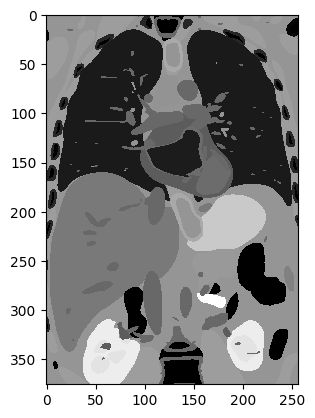

In [8]:
# Selecting and displaying phantom slice
dataDisplay = transpose(data[120,:,:]);
img = imshow(dataDisplay,cmap="gray", interpolation="none"); # part of PyPlot

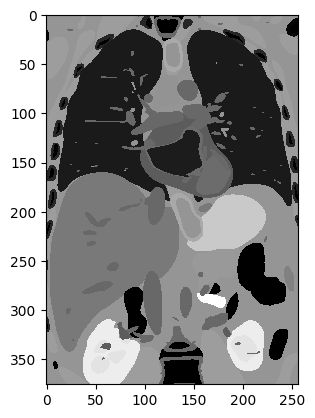

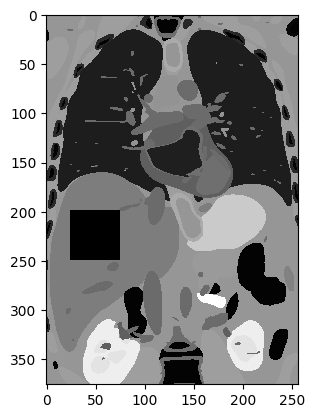

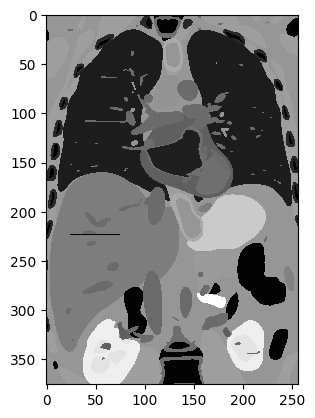

PyObject <matplotlib.image.AxesImage object at 0x000000002D02BD68>

In [9]:
# Selecting Anatomical region based on image and displaying them
startPixelRow = 200;
endPixelRow = 250;
startPixelCol = 25;
endPixelCol = 75;
middleRow = Int64.(round((startPixelRow + endPixelRow) / 2));
middleCol = Int64.(round((startPixelCol + endPixelCol) / 2));

dataTemp = deepcopy(dataDisplay);
dataTemp[startPixelRow:(endPixelRow), startPixelCol:(endPixelCol)] = 0.;

dataTemp2 = deepcopy(dataDisplay);
dataTemp2[middleRow, startPixelCol:(endPixelCol)] = 0.;

figure(1);imshow(dataDisplay,cmap="gray",interpolation="none")
figure(2);imshow(dataTemp,cmap="gray",interpolation="none")
figure(3);imshow(dataTemp2, cmap = "gray",interpolation="none")

In [13]:
# Extract Intensity information from the region of interest
imgDataROI = dataDisplay[100:350,:]#[startPixelRow:(endPixelRow), startPixelCol:(endPixelCol)];
writedlm("data/Thoracic-Abdomen.txt", imgDataROI);